Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

def readCsv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

enrollments = readCsv('enrollments.csv')
dailyEngagement = readCsv('daily_engagement.csv')
submissions = readCsv('project_submissions.csv')

## Test print

In [3]:
print enrollments[0]
print dailyEngagement[0]
print submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in dailyEngagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
dailyEngagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def uniqAcct(data, coln):
    keys=list()

    for entry in data:
        try:
            keys.index(entry[coln])
        except ValueError:
            keys.append(entry[coln])
    return len(keys)

def uniqAcct2(data, coln):
    uniq = set()
    for record in data:
        uniq.add(record[coln])
    return len(uniq)

def uniqStudentAcct(data):
    ustudents = set()
    for student in data:
        ustudents.add(student['account_key'])
    return ustudents

print "Total number of rows in enrollments:", len(enrollments)
print "accounts number in enrollments:", uniqAcct(enrollments, 'account_key'), "\n"
print "Total number of rows in daily engagement:", len(dailyEngagement)
print "accounts number in daily engagement:", uniqAcct(dailyEngagement, 'acct'), "\n"
print "Total number of rows in submissions:", len(submissions)
print "accounts number in submissions:", uniqAcct2(submissions, 'account_key')

Total number of rows in enrollments: 1640
accounts number in enrollments: 1302 

Total number of rows in daily engagement: 136240
accounts number in daily engagement: 1237 

Total number of rows in submissions: 3642
accounts number in submissions: 743


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for record in dailyEngagement:
    record['account_key'] = record['acct']
    del record['acct']  

In [9]:
print dailyEngagement[0]['account_key']

0


## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
uniqstudentEnroll = uniqStudentAcct(enrollments)
uniqstudentEngage = uniqStudentAcct(dailyEngagement)

def select(dlist, coln, val):
    for d in dlist:
        if d[coln] == val:
            return d

for s in uniqstudentEnroll:
    if s not in uniqstudentEngage:
        print select(enrollments, 'account_key', s)
        break


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 4, 0, 0), u'account_key': u'1145', u'cancel_date': datetime.datetime(2015, 4, 4, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

def isSameDayOut(student):
    if student['join_date'] == student['cancel_date']:
        return True

def isCancelDateNone(student):
    if student['cancel_date'] is None:
        return True

sum = 0

for s in enrollments:
    if (s['account_key'] not in uniqstudentEngage) and (not isSameDayOut(s)):
        sum += 1
        print s

sum

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(dailyEngagement)
non_udacity_submissions = remove_udacity_accounts(submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
#def filter(listdata, fn):
#    cpd = copy.deepcopy(listdata)
#    for d in cpd:
#        if fn(d):
#            cpd.remove(d)
#    return cpd
    
def paid(student):
    if student['days_to_cancel'] == None or student['days_to_cancel'] > 7:
        return True
    else:
        return False

paidstudents = list(filter(paid, non_udacity_enrollments))

paid_students = dict()

#unique paid student with the most recent join date.
for s in paidstudents:
    acct = s['account_key']
    jdate = s['join_date']
    if acct not in paid_students:
        paid_students[acct]=jdate
    elif jdate > paid_students[acct]:
        paid_students[acct] = jdate

print len(paid_students)

995


## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = list()

for d in non_udacity_engagement:
    acct = d['account_key']
    if acct in paid_students and within_one_week(paid_students.get(acct), d['utc_date']):
        paid_engagement_in_first_week.append(d)

print "e.g.", paid_engagement_in_first_week[0]
print "\nTotal paid engagement in first week:", len(paid_engagement_in_first_week)

e.g. {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

Total paid engagement in first week: 6919


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

print "e.g.", engagement_by_account.items()[0]

e.g. (u'1200', [{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 114.853432, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 43.4168625, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 187.776832833, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 150.081577333, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 191.61088, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 8, 0, 0)}, {u'lessons_complete

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

print "e.g.", total_minutes_by_account.items()[0]

e.g. (u'619', 1482.9020456663002)


In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
minutesProWeek = 7 * 24 * 60

print max(total_minutes_by_account.items(), key=lambda t2: t2[1])

for acct in total_minutes_by_account:
    if total_minutes_by_account[acct] > minutesProWeek:
        print "account_key:", acct, "Joined date:", paid_students[acct]
        #for eng in engagement_by_account[acct]:
        #    print eng['utc_date'], "\t", eng['total_minutes_visited']
        
        
    
    

(u'163', 3564.7332644989997)


## Lessons Completed in First Week

e.g.
(u'619', 6)
min:	0
mean:	1.63618090452
max:	36
std:	3.00256129983


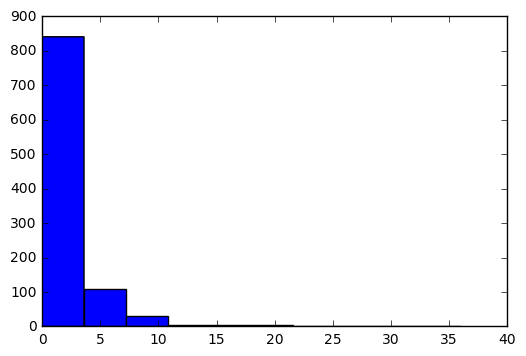

In [22]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
import numpy as np
import matplotlib.pyplot as plt

def describe(listdata):
    print "min:\t", np.min(listdata)
    print "mean:\t", np.mean(listdata)
    print "max:\t", np.max(listdata)
    print "std:\t", np.std(listdata)
    plt.hist(listdata)
    plt.show()
    
#e.g. {u'lessons_completed': 0,u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}    
def merge(listdata, keyname):
    mergedata = defaultdict(list)
    for d in listdata:
        mergedata[d[keyname]].append(d)
    return mergedata

def summerize(mergedata, item):
    sdata = dict()
    for k, vlist in mergedata.items():
        nsum = 0
        for v in vlist:
            nsum += v[item]           
        sdata[k] = nsum
        #sdata[k] = reduce(lambda x,y: x[item]+y[item], vlist)
    return sdata

engagement_by_account = merge(paid_engagement_in_first_week, 'account_key')
#print "e.g.\n", engagement_by_account.items()[0]

lessen_completed_by_account = summerize(engagement_by_account, 'lessons_completed')
print "e.g.\n", lessen_completed_by_account.items()[0]

describe(lessen_completed_by_account.values())

## Number of Visits in First Week

(u'341', [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 8.1853025, u'projects_completed': 0, 'account_key': u'341', u'utc_date': datetime.datetime(2015, 5, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 27.3461155, u'projects_completed': 0, 'account_key': u'341', u'utc_date': datetime.datetime(2015, 5, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'341', u'utc_date': datetime.datetime(2015, 5, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'341', u'utc_date': datetime.datetime(2015, 5, 13, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'341', u'utc_date': datetime.datetime(2015, 5, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0,

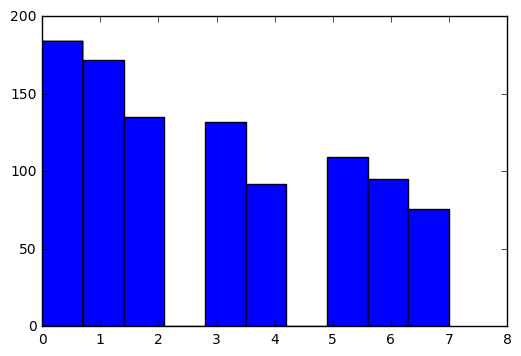

In [23]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

print engagement_by_account.items()[10]

def sumDayVisited(mergedata):
    sdata = dict()
    for k, vlist in mergedata.items():
        daysVisited = 0
        for v in vlist:
            if v['total_minutes_visited'] > 0:
                daysVisited += 1
        sdata[k] = daysVisited
    return sdata

daysVisitedByAccount = sumDayVisited(engagement_by_account)
describe(daysVisitedByAccount.values())
    

## Splitting out Passing Students

In [24]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

def isSubwayProjectPassed(d): #project_submission.csv
    OK = ['PASSED', 'DISTINCTION']
    if d['lesson_key'] in subway_project_lesson_keys and d['assigned_rating'] in OK:
        return True
    else:
        return False

passed = filter(isSubwayProjectPassed, submissions)
passedAccounts = uniqStudentAcct(passed)

import copy 
passing_engagement = list()
non_passing_engagement = list()

for r in paid_engagement_in_first_week:
    if r['account_key'] in passedAccounts:
        passing_engagement.append(r)
    else:
        non_passing_engagement.append(r)

print 'total:', len(paid_engagement_in_first_week)        
print 'passed:', len(passing_engagement)
print 'non-passing:', len(non_passing_engagement)

total: 6919
passed: 4527
non-passing: 2392


## Comparing the Two Student Groups

Total minutes visited for passing students:
min:	0.0
mean:	394.586046484
max:	3564.7332645
std:	448.499519327


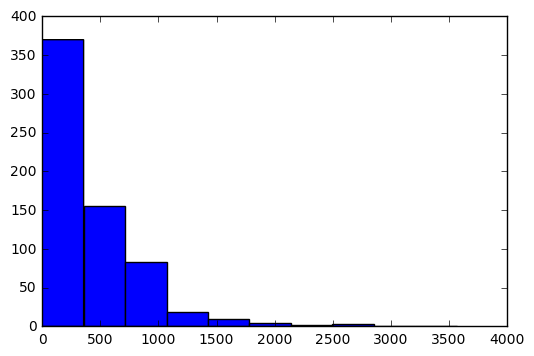


Total minutes visited for non-passing students:
min:	0.0
mean:	143.326474267
max:	1768.52274933
std:	269.538619011


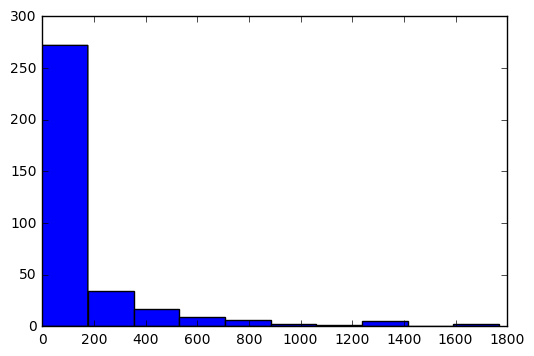


Total lessons completed for passing students:
min:	0
mean:	2.05255023184
max:	36
std:	3.14222705558


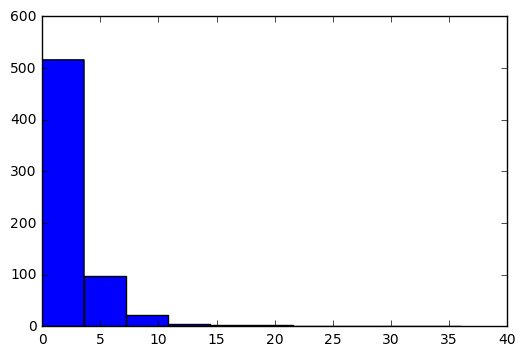


Total lessons completed for non-passing students:
min:	0
mean:	0.862068965517
max:	27
std:	2.54915994183


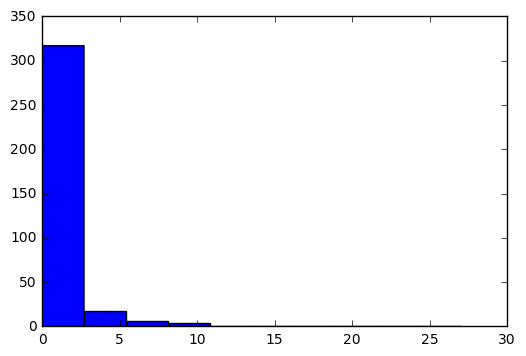


Number of courses visited for passing students:
min:	0
mean:	4.72642967543
max:	25
std:	3.7002397793


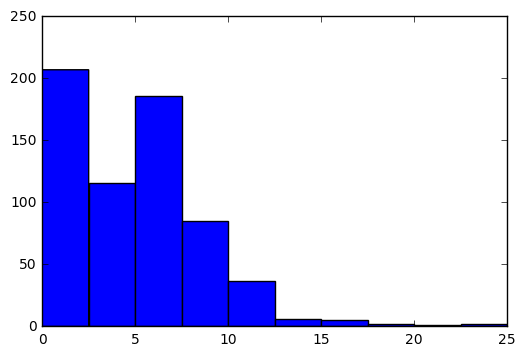


Number of courses visited for non-passing students:
min:	0
mean:	2.58908045977
max:	18
std:	2.90670969025


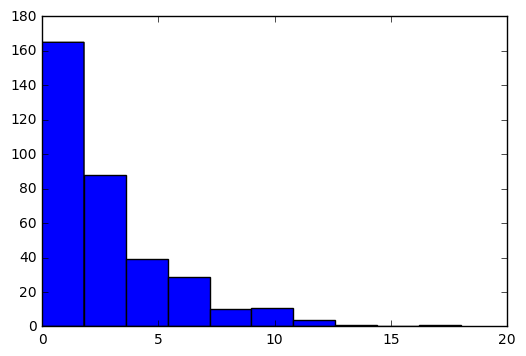

In [25]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
#print "e.g.", passing_engagement[0]

key = 'account_key'
passingGrp = merge(passing_engagement, key)
nonPassingGrp = merge(non_passing_engagement, key)

# total_minutes_visited
coln = 'total_minutes_visited'
passingTotalMinutesByAccount = summerize(passingGrp, coln)
nonPassingTotalMinutesByAccount = summerize(nonPassingGrp, coln)

print "Total minutes visited for passing students:"
describe(passingTotalMinutesByAccount.values())
print "\nTotal minutes visited for non-passing students:"
describe(nonPassingTotalMinutesByAccount.values())

# lessons_completed
coln = 'lessons_completed'
passingLessonsCompletedByAccount = summerize(passingGrp, coln)
nonPassingLessonsCompletedByAccount = summerize(nonPassingGrp, coln)

print "\nTotal lessons completed for passing students:"
describe(passingLessonsCompletedByAccount.values())
print "\nTotal lessons completed for non-passing students:"
describe(nonPassingLessonsCompletedByAccount.values())

# num_courses_visited
coln = 'num_courses_visited'
passingNumCourseVisitedByAccount = summerize(passingGrp, coln)
nonPassingNumCourseVisitedByAccount = summerize(nonPassingGrp, coln)

print "\nNumber of courses visited for passing students:"
describe(passingNumCourseVisitedByAccount.values())
print "\nNumber of courses visited for non-passing students:"
describe(nonPassingNumCourseVisitedByAccount.values())       

## Making Histograms

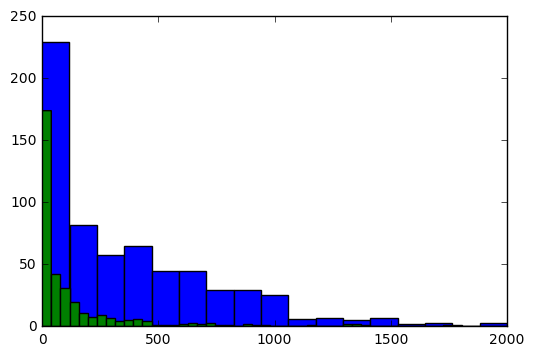

In [26]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
binsize = 'auto'
rangewidth = (0, 2000)
plt.hist(passingTotalMinutesByAccount.values(), binsize, rangewidth)
plt.hist(nonPassingTotalMinutesByAccount.values(), binsize, rangewidth)
plt.show()

## Improving Plots and Sharing Findings

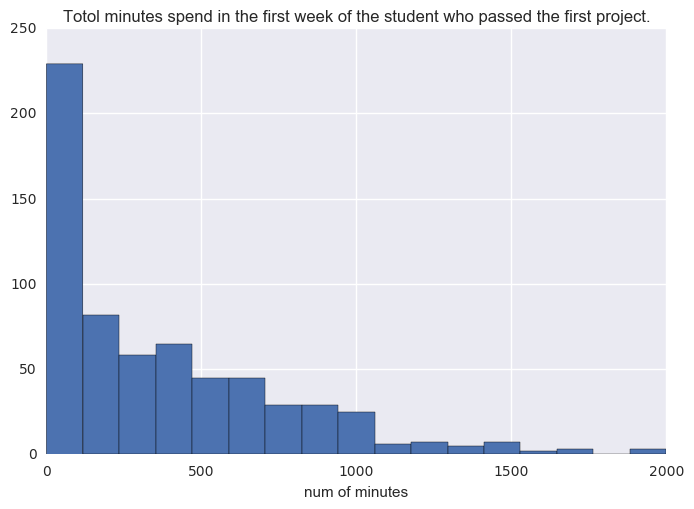

In [28]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns
binsize = 'auto'
rangewidth = (0, 2000)
plt.hist(passingTotalMinutesByAccount.values(), binsize, rangewidth)
plt.xlabel('num of minutes')
plt.title('Totol minutes spend in the first week of the student who passed the first project.')
plt.show()